In [25]:
# swarm algorithms imports
from swarm_algo.abc import ArtificialBeeColony as ABC

# problem imports
from problem.knapsack import Knapsack
from problem.tsp import TSP
from problem.ackley import AckleyFunction

# search algorithms imports
from search_algo.bfs import BreadthFirstSearch
from search_algo.dfs import DepthFirstSearch
from search_algo.hill_climbing import HillClimbing

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# utility imports
import random
import time
import logging
import os
from tqdm import tqdm
from typing import List, Tuple, Dict, Any
from pathlib import Path

In [26]:
DATASET_FOLDER = str(Path.cwd() / ".." / "data")

In [27]:
# Cấu hình logging và random seed
logging.basicConfig(level=logging.INFO)
np.random.seed(42)
random.seed(42)

# Thiết lập style cho visualization
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 10

# Phân tích độ nhạy tham số và khả năng hội tụ

Các tham số quan trọng trong ABC:
- `sn`: số lượng nguồn thức ăn (employed bees).
- `limit`: ngưỡng bỏ nguồn (abandonment threshold).
- `mcn`: số vòng lặp tối đa (maximum cycle number).

## Ackley Function

In [28]:
def run_abc_ackley(
    problem_num,
    sn=20,
    limit=100,
    mcn=200,
    num_runs=5,
):
    ackley_folder = os.path.join(DATASET_FOLDER, "ackley")
    ackley = AckleyFunction(PROBLEM_FOLDER=ackley_folder, PROBLEM=problem_num)
    
    best_fitnesses = []
    convergence_histories = []
    execution_times = []
    
    for run in range(num_runs):
        # Khởi tạo ABC
        abc = ABC(
            dimension=ackley.dimension,
            sn=sn,
            mcn=mcn,
            limit=limit,
            lb=-32.768,
            ub=32.768,
        )
        
        # Set objective function
        abc.set_objective_function(ackley.calculate_fitness)
        
        # Chạy thuật toán
        start_time = time.time()
        best_solution, best_fitness, history = abc.run(visualize=False)
        end_time = time.time()
        
        # ABC fitness = 1/(1+value), so value = 1/fitness - 1
        best_value = 1 / best_fitness - 1 if best_fitness > 0 else float("inf")
        obj_history = [1 / f - 1 if f > 0 else float("inf") for f in history]
        
        best_fitnesses.append(best_value)
        convergence_histories.append(obj_history)
        execution_times.append(end_time - start_time)
    
    return {
        "best_fitness": np.min(best_fitnesses),
        "avg_fitness": np.mean(best_fitnesses),
        "std_fitness": np.std(best_fitnesses),
        "convergence_history": convergence_histories,
        "avg_time": np.mean(execution_times),
        "all_best_fitnesses": best_fitnesses,
    }

### 1. Phân tích độ nhạy của tham số `sn`

In [29]:
# Test với các giá trị khác nhau của sn cho Ackley
problem_num_ackley = 10
sn_values_ackley = [5, 10, 15, 20, 30, 40, 50]
mcn_ackley = 200
num_runs_ackley = 5

results_sn_ackley = []

print("Đang test tham số sn cho Ackley Function...")
for n in tqdm(sn_values_ackley):
    result = run_abc_ackley(
        problem_num=problem_num_ackley,
        sn=n,
        limit=100,
        mcn=mcn_ackley,
        num_runs=num_runs_ackley,
    )
    result["sn"] = n
    results_sn_ackley.append(result)
    print(
        f"sn={n}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}, Time={result['avg_time']:.3f}s"
    )

Đang test tham số sn cho Ackley Function...


 14%|█▍        | 1/7 [00:00<00:00,  6.21it/s]

sn=5: Best=0.0040, Avg=1.8056, Time=0.032s


 29%|██▊       | 2/7 [00:00<00:01,  4.04it/s]

sn=10: Best=0.0003, Avg=0.0007, Time=0.061s


 43%|████▎     | 3/7 [00:00<00:01,  2.98it/s]

sn=15: Best=0.0002, Avg=0.0004, Time=0.088s


 57%|█████▋    | 4/7 [00:01<00:01,  2.30it/s]

sn=20: Best=0.0001, Avg=0.0002, Time=0.117s


 71%|███████▏  | 5/7 [00:03<00:02,  1.13s/it]

sn=30: Best=0.0002, Avg=0.0003, Time=0.471s


 86%|████████▌ | 6/7 [00:04<00:01,  1.13s/it]

sn=40: Best=0.0001, Avg=0.0002, Time=0.227s


100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

sn=50: Best=0.0002, Avg=0.0003, Time=0.286s


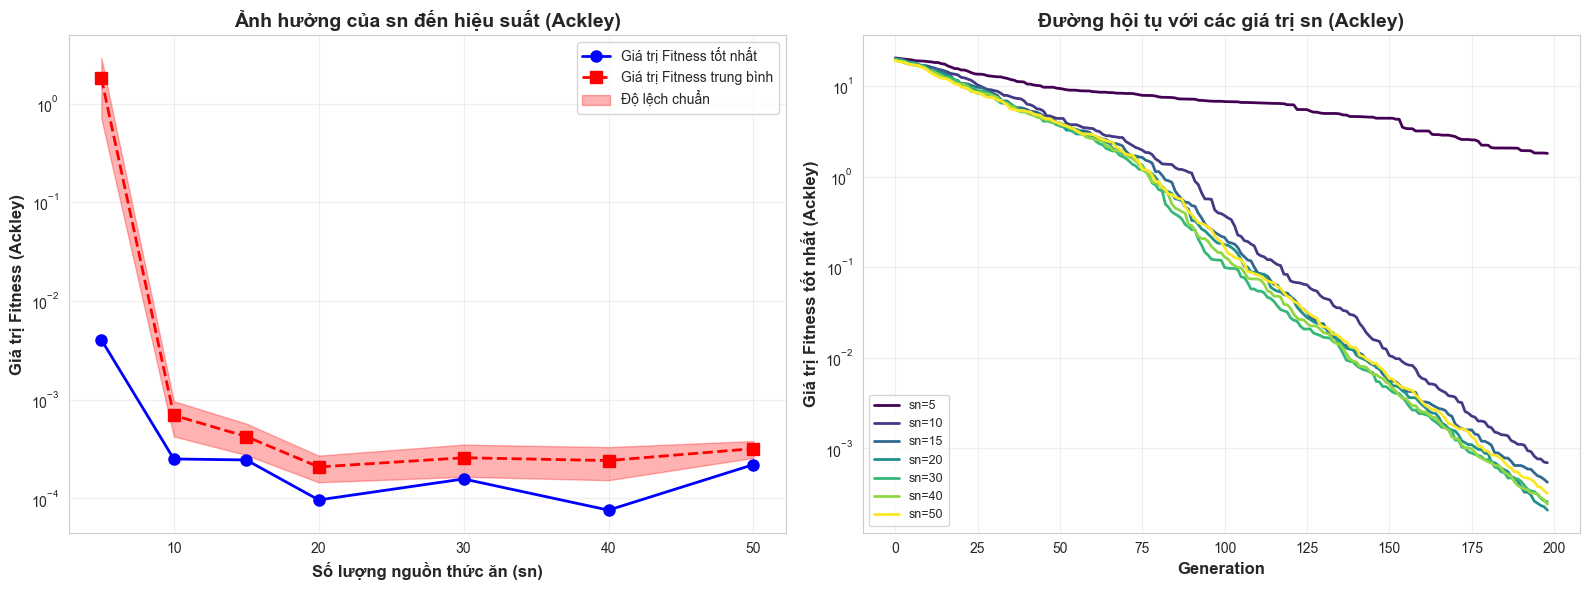

In [30]:
# Visualization cho sn - Ackley
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Best/Giá trị Fitness trung bình vs sn
ax1 = axes[0]
n_vals_ackley = [r["sn"] for r in results_sn_ackley]
best_vals_ackley = [r["best_fitness"] for r in results_sn_ackley]
avg_vals_ackley = [r["avg_fitness"] for r in results_sn_ackley]
std_vals_ackley = [r["std_fitness"] for r in results_sn_ackley]

ax1.plot(
    n_vals_ackley,
    best_vals_ackley,
    "bo-",
    linewidth=2,
    markersize=8,
    label="Giá trị Fitness tốt nhất",
)
ax1.plot(
    n_vals_ackley,
    avg_vals_ackley,
    "rs--",
    linewidth=2,
    markersize=8,
    label="Giá trị Fitness trung bình",
)
ax1.fill_between(
    n_vals_ackley,
    np.array(avg_vals_ackley) - np.array(std_vals_ackley),
    np.array(avg_vals_ackley) + np.array(std_vals_ackley),
    alpha=0.3,
    color="red",
    label="Độ lệch chuẩn",
)
ax1.set_xlabel("Số lượng nguồn thức ăn (sn)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Giá trị Fitness (Ackley)", fontsize=12, fontweight="bold")
ax1.set_title(
    "Ảnh hưởng của sn đến hiệu suất (Ackley)", fontsize=14, fontweight="bold"
)
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

# 2. Convergence curves
ax2 = axes[1]
colors = plt.cm.viridis(np.linspace(0, 1, len(results_sn_ackley)))
for i, result in enumerate(results_sn_ackley):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax2.plot(
        avg_history,
        color=colors[i],
        linewidth=2,
        label=f"sn={result['sn']}",
    )
ax2.set_xlabel("Generation", fontsize=12, fontweight="bold")
ax2.set_ylabel("Giá trị Fitness tốt nhất (Ackley)", fontsize=12, fontweight="bold")
ax2.set_title(
    "Đường hội tụ với các giá trị sn (Ackley)", fontsize=14, fontweight="bold"
)
ax2.legend(loc="best", fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_yscale("log")

plt.tight_layout()
plt.show()

### 2. Phân tích độ nhạy của tham số `limit`

In [31]:
# Test với các giá trị khác nhau của limit cho Ackley
limit_values_ackley = [20, 40, 60, 80, 100, 150, 200]
results_limit_ackley = []

print("Đang test tham số limit cho Ackley Function...")
for lim in tqdm(limit_values_ackley):
    result = run_abc_ackley(
        problem_num=problem_num_ackley,
        sn=20,
        limit=lim,
        mcn=mcn_ackley,
        num_runs=num_runs_ackley,
    )
    result["limit"] = lim
    results_limit_ackley.append(result)
    print(
        f"limit={lim}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}"
    )

Đang test tham số limit cho Ackley Function...


 14%|█▍        | 1/7 [00:00<00:03,  1.66it/s]

limit=20: Best=0.0117, Avg=0.4790


 29%|██▊       | 2/7 [00:01<00:02,  1.68it/s]

limit=40: Best=0.0003, Avg=0.0004


 43%|████▎     | 3/7 [00:01<00:02,  1.68it/s]

limit=60: Best=0.0001, Avg=0.0004


 57%|█████▋    | 4/7 [00:02<00:01,  1.69it/s]

limit=80: Best=0.0001, Avg=0.0004


 71%|███████▏  | 5/7 [00:02<00:01,  1.70it/s]

limit=100: Best=0.0001, Avg=0.0007


 86%|████████▌ | 6/7 [00:03<00:00,  1.70it/s]

limit=150: Best=0.0001, Avg=0.0003


100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

limit=200: Best=0.0001, Avg=0.0003


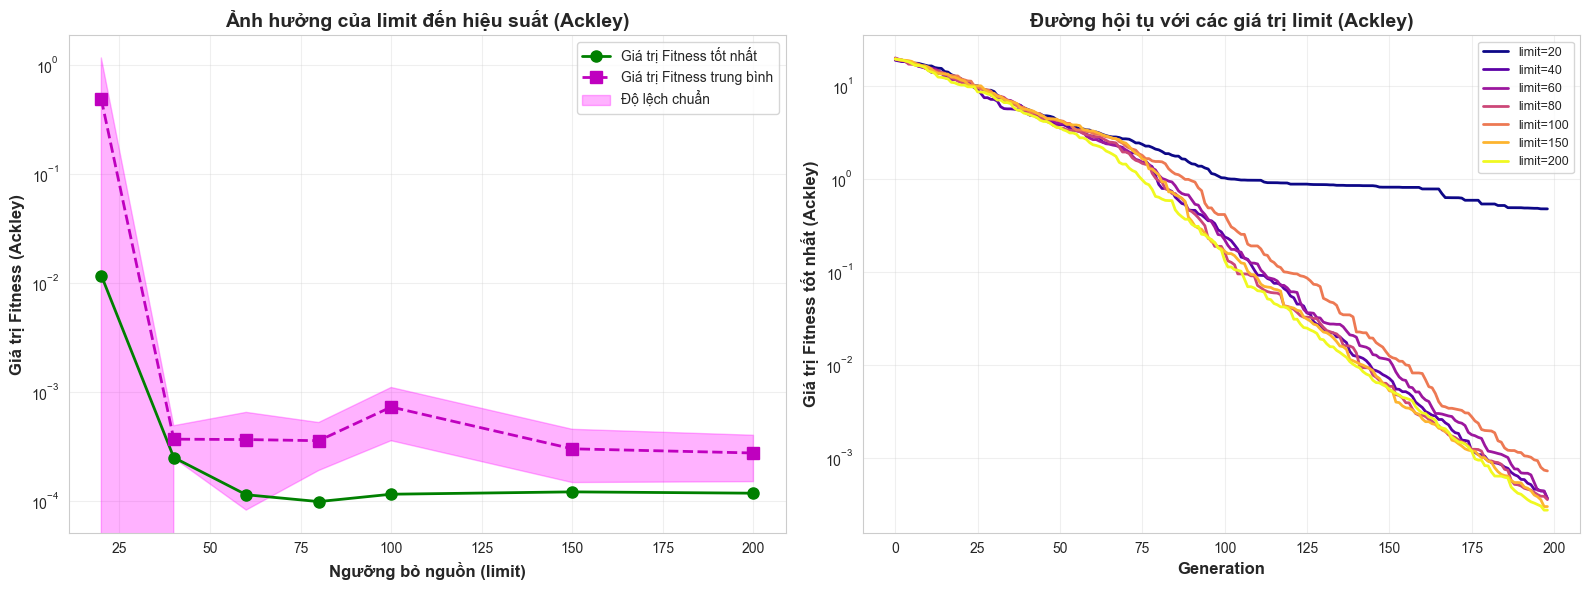

In [32]:
# Visualization cho limit - Ackley
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Best/Giá trị Fitness trung bình vs limit
ax1 = axes[0]
lim_vals_ackley = [r["limit"] for r in results_limit_ackley]
best_vals_ackley = [r["best_fitness"] for r in results_limit_ackley]
avg_vals_ackley = [r["avg_fitness"] for r in results_limit_ackley]
std_vals_ackley = [r["std_fitness"] for r in results_limit_ackley]

ax1.plot(
    lim_vals_ackley,
    best_vals_ackley,
    "go-",
    linewidth=2,
    markersize=8,
    label="Giá trị Fitness tốt nhất",
)
ax1.plot(
    lim_vals_ackley,
    avg_vals_ackley,
    "ms--",
    linewidth=2,
    markersize=8,
    label="Giá trị Fitness trung bình",
)
ax1.fill_between(
    lim_vals_ackley,
    np.array(avg_vals_ackley) - np.array(std_vals_ackley),
    np.array(avg_vals_ackley) + np.array(std_vals_ackley),
    alpha=0.3,
    color="magenta",
    label="Độ lệch chuẩn",
)
ax1.set_xlabel("Ngưỡng bỏ nguồn (limit)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Giá trị Fitness (Ackley)", fontsize=12, fontweight="bold")
ax1.set_title(
    "Ảnh hưởng của limit đến hiệu suất (Ackley)", fontsize=14, fontweight="bold"
)
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

# 2. Convergence curves
ax2 = axes[1]
colors = plt.cm.plasma(np.linspace(0, 1, len(results_limit_ackley)))
for i, result in enumerate(results_limit_ackley):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax2.plot(
        avg_history, color=colors[i], linewidth=2, label=f"limit={result['limit']}"
    )
ax2.set_xlabel("Generation", fontsize=12, fontweight="bold")
ax2.set_ylabel("Giá trị Fitness tốt nhất (Ackley)", fontsize=12, fontweight="bold")
ax2.set_title(
    "Đường hội tụ với các giá trị limit (Ackley)", fontsize=14, fontweight="bold"
)
ax2.legend(loc="best", fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_yscale("log")

plt.tight_layout()
plt.show()

### 3. Phân tích độ nhạy của tham số `mcn`

In [33]:
# Test với các giá trị khác nhau của mcn cho Ackley
mcn_values_ackley = [50, 100, 150, 200, 250, 300, 400]
results_mcn_ackley = []

print("Đang test tham số mcn cho Ackley Function...")
for m in tqdm(mcn_values_ackley):
    result = run_abc_ackley(
        problem_num=problem_num_ackley,
        sn=20,
        limit=100,
        mcn=m,
        num_runs=num_runs_ackley,
    )
    result["mcn"] = m
    results_mcn_ackley.append(result)
    print(
        f"mcn={m}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}"
    )

Đang test tham số mcn cho Ackley Function...


 14%|█▍        | 1/7 [00:00<00:00,  6.28it/s]

mcn=50: Best=3.3949, Avg=3.8673


 29%|██▊       | 2/7 [00:00<00:01,  4.20it/s]

mcn=100: Best=0.1717, Avg=0.2285


 43%|████▎     | 3/7 [00:00<00:01,  3.05it/s]

mcn=150: Best=0.0034, Avg=0.0057


 57%|█████▋    | 4/7 [00:01<00:01,  2.33it/s]

mcn=200: Best=0.0002, Avg=0.0003


 71%|███████▏  | 5/7 [00:02<00:01,  1.87it/s]

mcn=250: Best=0.0000, Avg=0.0000


 86%|████████▌ | 6/7 [00:03<00:00,  1.54it/s]

mcn=300: Best=0.0000, Avg=0.0000


100%|██████████| 7/7 [00:04<00:00,  1.66it/s]

mcn=400: Best=0.0000, Avg=0.0000


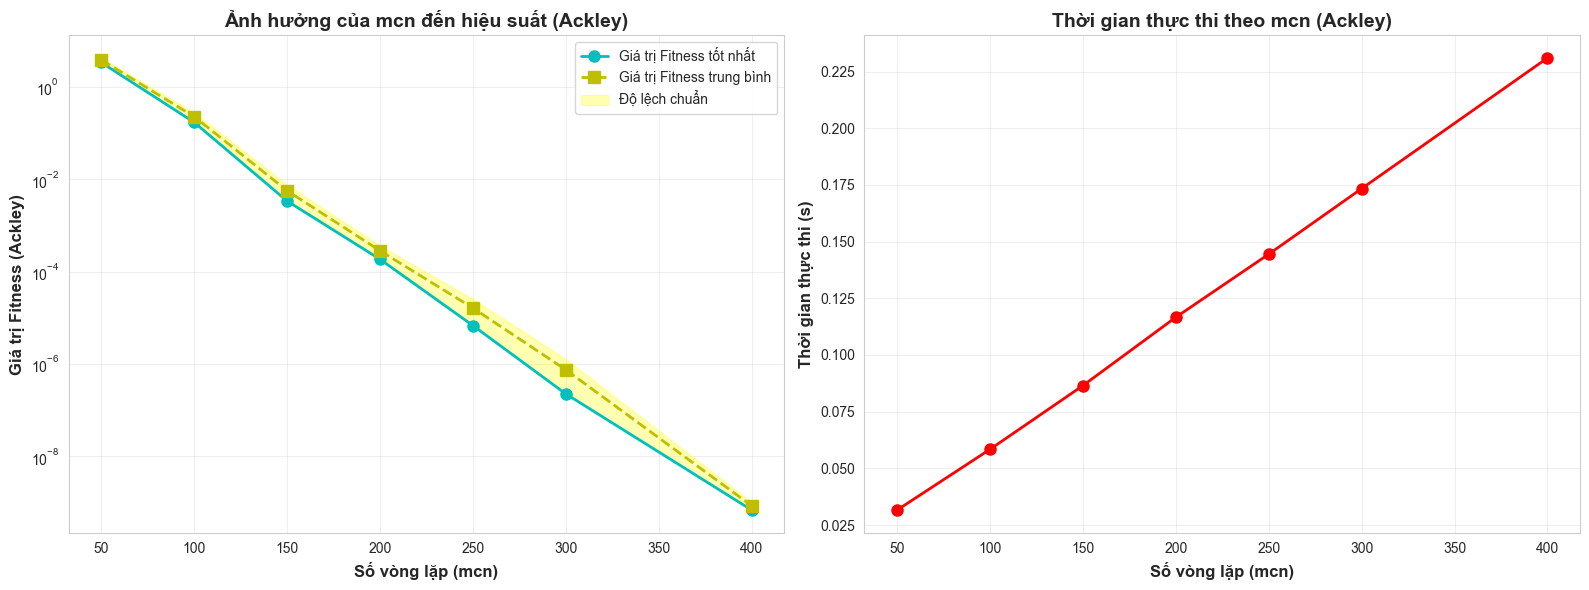

In [34]:
# Visualization cho mcn - Ackley
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Best/Giá trị Fitness trung bình vs mcn
ax1 = axes[0]
mcn_vals_ackley = [r["mcn"] for r in results_mcn_ackley]
best_vals_ackley = [r["best_fitness"] for r in results_mcn_ackley]
avg_vals_ackley = [r["avg_fitness"] for r in results_mcn_ackley]
std_vals_ackley = [r["std_fitness"] for r in results_mcn_ackley]

ax1.plot(
    mcn_vals_ackley,
    best_vals_ackley,
    "co-",
    linewidth=2,
    markersize=8,
    label="Giá trị Fitness tốt nhất",
)
ax1.plot(
    mcn_vals_ackley,
    avg_vals_ackley,
    "ys--",
    linewidth=2,
    markersize=8,
    label="Giá trị Fitness trung bình",
)
ax1.fill_between(
    mcn_vals_ackley,
    np.array(avg_vals_ackley) - np.array(std_vals_ackley),
    np.array(avg_vals_ackley) + np.array(std_vals_ackley),
    alpha=0.3,
    color="yellow",
    label="Độ lệch chuẩn",
)
ax1.set_xlabel("Số vòng lặp (mcn)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Giá trị Fitness (Ackley)", fontsize=12, fontweight="bold")
ax1.set_title(
    "Ảnh hưởng của mcn đến hiệu suất (Ackley)", fontsize=14, fontweight="bold"
)
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

# 2. Execution time vs mcn
ax2 = axes[1]
time_vals_ackley = [r["avg_time"] for r in results_mcn_ackley]
ax2.plot(mcn_vals_ackley, time_vals_ackley, "ro-", linewidth=2, markersize=8)
ax2.set_xlabel("Số vòng lặp (mcn)", fontsize=12, fontweight="bold")
ax2.set_ylabel("Thời gian thực thi (s)", fontsize=12, fontweight="bold")
ax2.set_title(
    "Thời gian thực thi theo mcn (Ackley)", fontsize=14, fontweight="bold"
)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()